In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def print_image(image):
    plt.imshow(image, cmap='gray', interpolation='nearest', aspect='auto')

In [3]:
def FLD(image):
    e1 = cv2.getTickCount()
    # Create default Fast Line Detector class
    fld = cv2.ximgproc.createFastLineDetector()
    # Get line vectors from the image
    lines = fld.detect(image)
    e2 = cv2.getTickCount()
    print('FLD time: ', (e2 - e1)/ cv2.getTickFrequency())
    # Draw lines on the image
    line_on_image = fld.drawSegments(image, lines)
    
    return line_on_image

(345, 487, 3)
(345, 487)
FLD time:  0.006003198
(345, 487, 3)


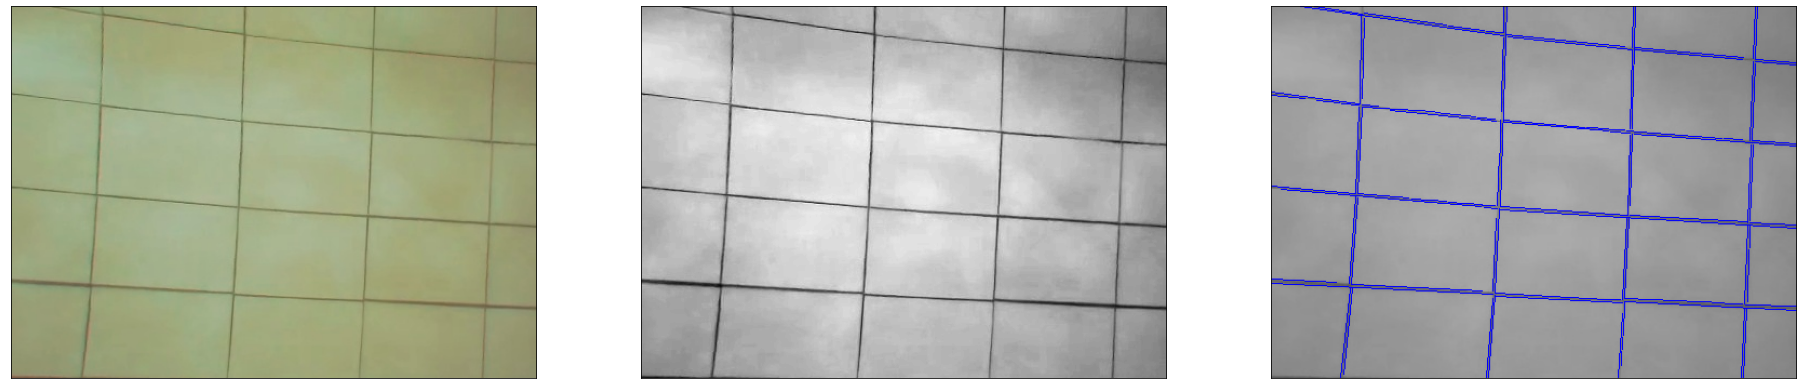

In [90]:
IMAGE_PATH = '../images/calib/frame_9.jpg'

img = cv2.imread(IMAGE_PATH)
print(img.shape)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(gray.shape)

img_with_lines = FLD(gray)
print(img_with_lines.shape)

images = [img, gray, img_with_lines]

fig = plt.figure(figsize=(32,24))

for i in range(len(images)):
    fig.add_subplot(1, 3, i + 1)
    plt.imshow(images[i],'gray')
    plt.xticks([]),plt.yticks([])

In [91]:
def rotate(image, angle):
    rows,cols = image.shape
    # cols-1 and rows-1 are the coordinate limits.
    M = cv2.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),angle,1)
    dst = cv2.warpAffine(img,M,(cols,rows))
    return dst

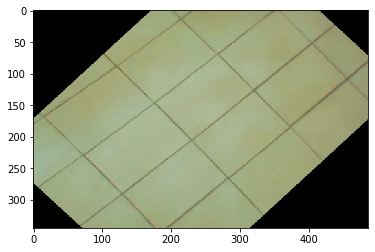

In [92]:
rotated = rotate(gray, 45)
print_image(rotated)

In [93]:
def adaptive_threshold(image):
    e1 = cv2.getTickCount()
    th = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
    e2 = cv2.getTickCount()
    print('adaptive_threshold time: ', (e2 - e1)/ cv2.getTickFrequency())
    return th
    

In [94]:
def otsu_threshold(image):
    ret3,otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    return otsu

adaptive_threshold time:  0.002943221
FLD time:  0.01045266
0.016607766


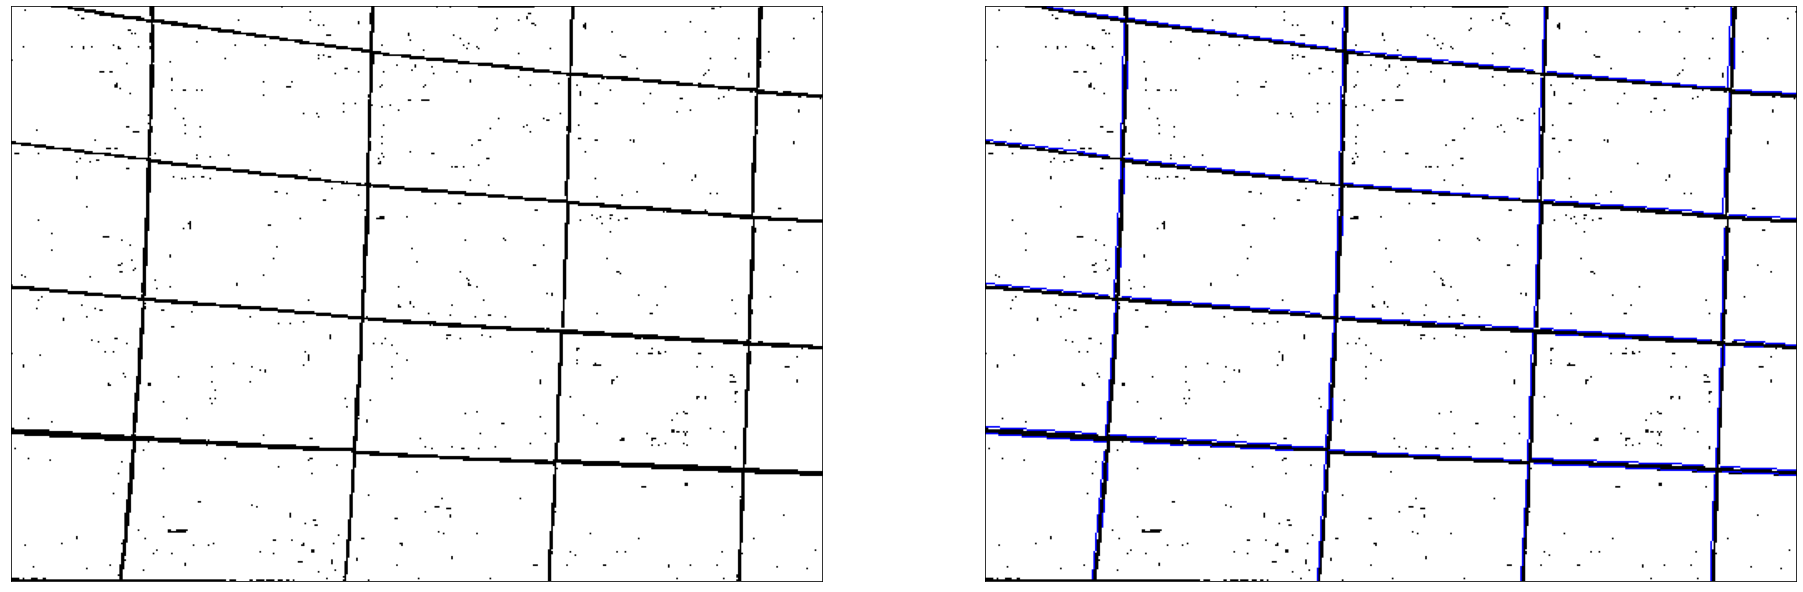

In [95]:
e1 = cv2.getTickCount()

th = adaptive_threshold(gray)
th_lines = FLD(th)

e2 = cv2.getTickCount()
time = (e2 - e1)/ cv2.getTickFrequency()
print(time)

images = [th, th_lines]

fig = plt.figure(figsize=(32,24))

for i in range(len(images)):
    fig.add_subplot(1, len(images), i + 1)
    plt.xticks([]),plt.yticks([])
    plt.imshow(images[i],'gray')


In [96]:
def gauss_blur(image):
    e1 = cv2.getTickCount()
    blur = cv2.GaussianBlur(image,(5,5),0)
    e2 = cv2.getTickCount()
    print('gauss_blur time: ', (e2 - e1)/ cv2.getTickFrequency())
    return blur

In [97]:
def bilaterial_filter(image):
    e1 = cv2.getTickCount()
    blur = cv2.bilateralFilter(image,9,75,75)
    e2 = cv2.getTickCount()
    print('bilaterial filter time: ', (e2 - e1)/ cv2.getTickFrequency())
    return blur

gauss_blur time:  0.007545454
adaptive_threshold time:  0.002349317


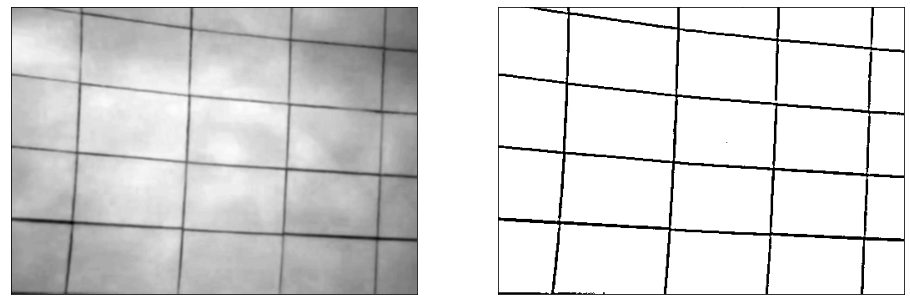

In [98]:
blur = gauss_blur(gray)
th = adaptive_threshold(blur)


images = [blur, th]

fig = plt.figure(figsize=(16,12))

for i in range(len(images)):
    fig.add_subplot(1, len(images), i + 1)
    plt.xticks([]),plt.yticks([])
    plt.imshow(images[i],'gray')

In [99]:
def opening_joints(image):
    kernel = np.ones((15,15),np.uint8)
    e1 = cv2.getTickCount()
    opening = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel)
    e2 = cv2.getTickCount()
    print('opening_joints time: ', (e2 - e1)/ cv2.getTickFrequency())
    return opening

opening_joints time:  0.001041547


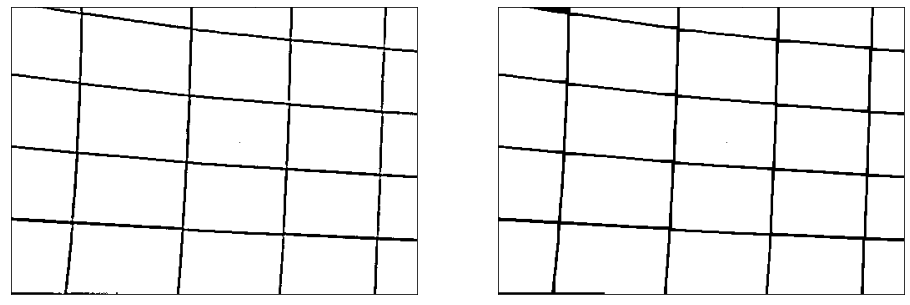

In [100]:
opening = opening_joints(th)
images = [th, opening]

fig = plt.figure(figsize=(16,12))

for i in range(len(images)):
    fig.add_subplot(1, len(images), i + 1)
    plt.xticks([]),plt.yticks([])
    plt.imshow(images[i],'gray')

In [101]:
def canny_detector(image):
    e1 = cv2.getTickCount()
    edges = cv2.Canny(image,50,150,apertureSize = 3)
    e2 = cv2.getTickCount()
    print('canny_detector time: ', (e2 - e1)/ cv2.getTickFrequency())
    return edges

In [104]:
def HLD(image):
    e1 = cv2.getTickCount()
    lines = cv2.HoughLines(image,1,np.pi/180,300)
    e2 = cv2.getTickCount()
    print('HLD time: ', (e2 - e1)/ cv2.getTickFrequency())

    return lines

canny_detector time:  0.002395039
HLD time:  0.008917122
HLD time:  0.014570201
lines none
18


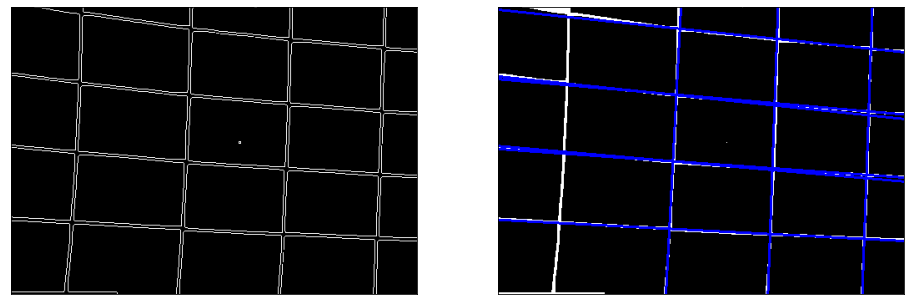

In [183]:
image = cv2.imread(IMAGE_PATH)
img_th = cv2.imread(IMAGE_PATH)
canny = canny_detector(opening)
bitwise = cv2.bitwise_not(opening)

lines = np.array([])
lines_th = np.array([])
lines = HLD(canny)
lines_th = HLD(bitwise)

bitwise = cv2.cvtColor(bitwise,cv2.COLOR_GRAY2RGB)
canny = cv2.cvtColor(canny,cv2.COLOR_GRAY2RGB)
if str(type(lines)) == "<class 'NoneType'>":
    print('lines none')
elif lines.size > 0:
    print(lines.size)
    for line in lines:
        rho,theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(canny,(x1,y1),(x2,y2),(0,0,255),2)
if str(type(lines_th)) == "<class 'NoneType'>":
    print('lines_th none')
elif lines_th.size > 0:
    print(lines_th.size)
    for line in lines_th:
        rho,theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(bitwise,(x1,y1),(x2,y2),(0,0,255),2)

images = [canny, bitwise]

fig = plt.figure(figsize=(16,12))

for i in range(len(images)):
    fig.add_subplot(1, len(images), i + 1)
    plt.xticks([]),plt.yticks([])
    plt.imshow(images[i],'gray')

In [211]:
#print(lines_th)
#sorted_lines = np.sort(lines_th,axis=0)
#print(sorted_lines)
#print(lines_th[:,:,:1])
a = lines_th.copy()
#print(a.shape)
a.ravel()
a.shape = (a.shape[0], a.shape[2])
#print(lines_th)
print(a)
print(a.shape)
print(a[a[:,0].argsort()])


[[2.5600000e+02 1.6231562e+00]
 [1.7100000e+02 1.6406095e+00]
 [8.7000000e+01 1.6580628e+00]
 [4.4900000e+02 3.4906585e-02]
 [1.6700000e+02 1.6580628e+00]
 [8.3000000e+01 1.6755161e+00]
 [3.3600000e+02 3.4906585e-02]
 [4.0000000e+00 1.6755161e+00]
 [2.1900000e+02 5.2359879e-02]]
(9, 2)
[[4.0000000e+00 1.6755161e+00]
 [8.3000000e+01 1.6755161e+00]
 [8.7000000e+01 1.6580628e+00]
 [1.6700000e+02 1.6580628e+00]
 [1.7100000e+02 1.6406095e+00]
 [2.1900000e+02 5.2359879e-02]
 [2.5600000e+02 1.6231562e+00]
 [3.3600000e+02 3.4906585e-02]
 [4.4900000e+02 3.4906585e-02]]


In [205]:
np.argsort(a, axis=0)[:,:1]

array([[7],
       [5],
       [2],
       [4],
       [1],
       [8],
       [0],
       [6],
       [3]])

In [207]:
print(lines_th)
print(a[a[:,1].argsort()])

[[[2.5600000e+02 1.6231562e+00]]

 [[1.7100000e+02 1.6406095e+00]]

 [[8.7000000e+01 1.6580628e+00]]

 [[4.4900000e+02 3.4906585e-02]]

 [[1.6700000e+02 1.6580628e+00]]

 [[8.3000000e+01 1.6755161e+00]]

 [[3.3600000e+02 3.4906585e-02]]

 [[4.0000000e+00 1.6755161e+00]]

 [[2.1900000e+02 5.2359879e-02]]]
[[4.4900000e+02 3.4906585e-02]
 [3.3600000e+02 3.4906585e-02]
 [2.1900000e+02 5.2359879e-02]
 [2.5600000e+02 1.6231562e+00]
 [1.7100000e+02 1.6406095e+00]
 [8.7000000e+01 1.6580628e+00]
 [1.6700000e+02 1.6580628e+00]
 [8.3000000e+01 1.6755161e+00]
 [4.0000000e+00 1.6755161e+00]]
